In [62]:
import numpy as np

## Load the weights

In [63]:
z = np.load('style_full.npz')
z.keys()

['conv8.bias',
 'conv8.weight',
 'conv7.bias',
 'conv7.weight',
 'conv6.bias',
 'conv6.weight',
 'conv5.bias',
 'conv5.weight',
 'conv4.bias',
 'conv4.weight',
 'conv3.bias',
 'conv3.weight',
 'conv2.bias',
 'conv2.weight',
 'conv1.bias',
 'conv1.weight']

In [64]:
w_conv1 = z['conv1.weight']
b_conv1 = z['conv1.bias']
w_conv2 = z['conv2.weight']
b_conv2 = z['conv2.bias']
w_conv3 = z['conv3.weight']
b_conv3 = z['conv3.bias']
w_conv4 = z['conv4.weight']
b_conv4 = z['conv4.bias']
w_conv5 = z['conv5.weight']
b_conv5 = z['conv5.bias']
w_conv6 = z['conv6.weight']
b_conv6 = z['conv6.bias']
w_conv7 = z['conv7.weight']
b_conv7 = z['conv7.bias']
w_conv8 = z['conv8.weight']
b_conv8 = z['conv8.bias']

## Read in the image and apply the net

In [65]:
from cs231n.fast_layers import conv_forward_im2col
conv_forward_fast = conv_forward_im2col

In [66]:
from PIL import Image
im = np.asarray(Image.open('im9.jpg').resize((128, 128)), dtype=np.float32)
im = im[np.newaxis, :, :, :].transpose(0, 3, 1, 2)

In [67]:
conv_param_x3 = {'stride': 1, 'pad': 1}
conv_param_x1 = {'stride': 1, 'pad': 0}

In [68]:
im.shape

(1, 3, 128, 128)

In [69]:
x = conv_forward_fast(im, w_conv1, b_conv1, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv2, b_conv2, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv3, b_conv3, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv4, b_conv4, conv_param=conv_param_x3)
x = np.maximum(x, 0) + im
x = conv_forward_fast(x, w_conv5, b_conv5, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv6, b_conv6, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv7, b_conv7, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv8, b_conv8, conv_param=conv_param_x3)
oui = np.maximum(x + im, 0)

In [70]:
ou = oui.reshape((3, 128, 128))
ou = ou.transpose(1, 2, 0)
ou = np.array(ou, dtype=np.uint8)
ou_im = Image.fromarray(ou)
ou_im.save('im9_after.jpg')

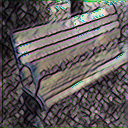

In [71]:
ou_im

## Calc the time

In [ ]:
%%timeit
x = conv_forward_fast(im, w_conv1, b_conv1, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv2, b_conv2, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv3, b_conv3, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv4, b_conv4, conv_param=conv_param_x3)
x = np.maximum(x, 0) + im
x = conv_forward_fast(x, w_conv5, b_conv5, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv6, b_conv6, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv7, b_conv7, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv8, b_conv8, conv_param=conv_param_x3)
oui = np.maximum(x + im, 0)